### notebook for data analysis

#### plots for the paper:
- number of papers in OSH over years
  - divide them per area (using research areas tags)
    - Engineering, life sciences, humanities?
- quality of the papers - use the open'o'metre plus if papers are open access or not
- Accessibility of the papers - how many are OA?



In [42]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
dataPath = "../data/derived2/"
dataFile = "articles.json"
data = pd.read_json(dataPath+dataFile)

In [22]:
areas = data["area"]
flatAreas=list()
for items in areas:
    if type(items) is list:
        for item in items:
            flatAreas.append(item)
    elif items==None:
        flatAreas.append(None)
    else:
        flatAreas.append(items)

<AxesSubplot:>

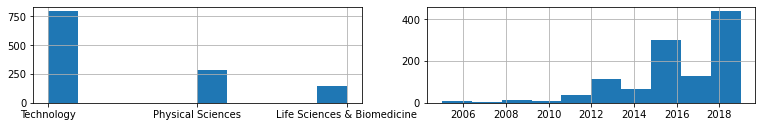

In [54]:
fh = plt.figure(figsize=(20,6))
#fh.size()
plt.subplot(3,3,1)
pd.Series(flatAreas).hist()
plt.subplot(3,3,2)
data["pubYear"].hist()
plt.subplot(3,3,2)
data["pubYear"].hist()


In [55]:
data.keys()

Index(['WOSUID', 'pubTitle', 'pubYear', 'pubType', 'journalTitle', 'publisher',
       'area', 'areaCount', 'identifier', 'keywords', 'abstract', 'doi',
       'url'],
      dtype='object')